### Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex

### Data Load

In [2]:
# data 불러오기
books = pd.read_csv("/data/ephemeral/home/book/code/data/books.csv")
users = pd.read_csv("/data/ephemeral/home/book/code/data/users.csv")
train_ratings = pd.read_csv('/data/ephemeral/home/book/code/data/train_ratings.csv')
test_ratings = pd.read_csv("/data/ephemeral/home/book/code/data/test_ratings.csv")

In [3]:
print("Books shape:\n", books.shape)
print("Users shape:\n", users.shape)
print("Train Ratings shape:\n", train_ratings.shape)
print("Test Ratings shape: \n", test_ratings)

Books shape:
 (149570, 10)
Users shape:
 (68092, 3)
Train Ratings shape:
 (306795, 3)
Test Ratings shape: 
        user_id        isbn  rating
0        11676  0002005018       0
1       116866  0002005018       0
2       152827  0060973129       0
3       157969  0374157065       0
4        67958  0399135782       0
...        ...         ...     ...
76694   278543  1576734218       0
76695   278563  3492223710       0
76696   278633  1896095186       0
76697   278668  8408044079       0
76698   278851  0767907566       0

[76699 rows x 3 columns]


In [4]:
print("Books 결측값:\n", books.isnull().sum())
print("Users 결측값:\n", users.isnull().sum())
print("Train Ratings 결측값:\n", train_ratings.isnull().sum())

Books 결측값:
 isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
dtype: int64
Users 결측값:
 user_id         0
location        0
age         27833
dtype: int64
Train Ratings 결측값:
 user_id    0
isbn       0
rating     0
dtype: int64


In [5]:
# 각 데이터셋의 데이터 타입 확인
print("Books 데이터 타입:\n", books.dtypes)
print("Users 데이터 타입:\n", users.dtypes)
print("Train Ratings 데이터 타입:\n", train_ratings.dtypes)

Books 데이터 타입:
 isbn                    object
book_title              object
book_author             object
year_of_publication    float64
publisher               object
img_url                 object
language                object
category                object
summary                 object
img_path                object
dtype: object
Users 데이터 타입:
 user_id       int64
location     object
age         float64
dtype: object
Train Ratings 데이터 타입:
 user_id     int64
isbn       object
rating      int64
dtype: object


In [6]:
# Books의 고유값 확인
print("고유 ISBN 수:", books['isbn'].nunique())
print("고유 Book Title 수:", books['book_title'].nunique())
print("고유 Author 수:", books['book_author'].nunique())

# Users의 고유값 확인
print("고유 User ID 수:", users['user_id'].nunique())

고유 ISBN 수: 149570
고유 Book Title 수: 135436
고유 Author 수: 62058
고유 User ID 수: 68092


In [7]:
len(set(test_ratings['user_id']) - set(train_ratings['user_id']))

8266

train에 없는 user_id -> coldstart user : 8266

### EDA

##### Books

- year_of_publication : 오른쪽으로 치우친 분포
- language : en 이 대부분, 결측치 40% 
- category : 전처리 필요, 약 4000여 개 ->겹치는 범주 합치기, 범주 간 평점 분포는 비슷함

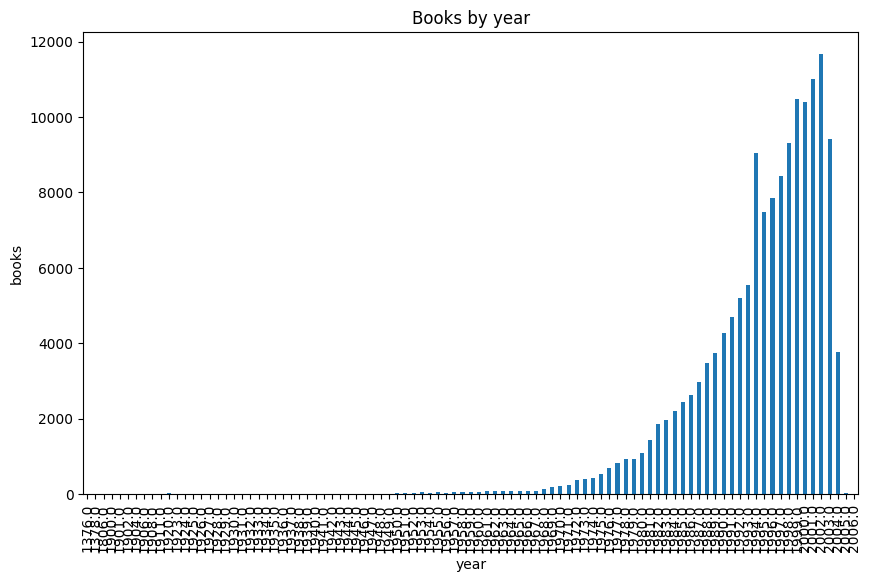

In [ ]:
# 연도별 발행된 도서 수 시각화
plt.figure(figsize=(10, 6))
books['year_of_publication'].value_counts().sort_index().plot(kind='bar')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('books')
plt.show()

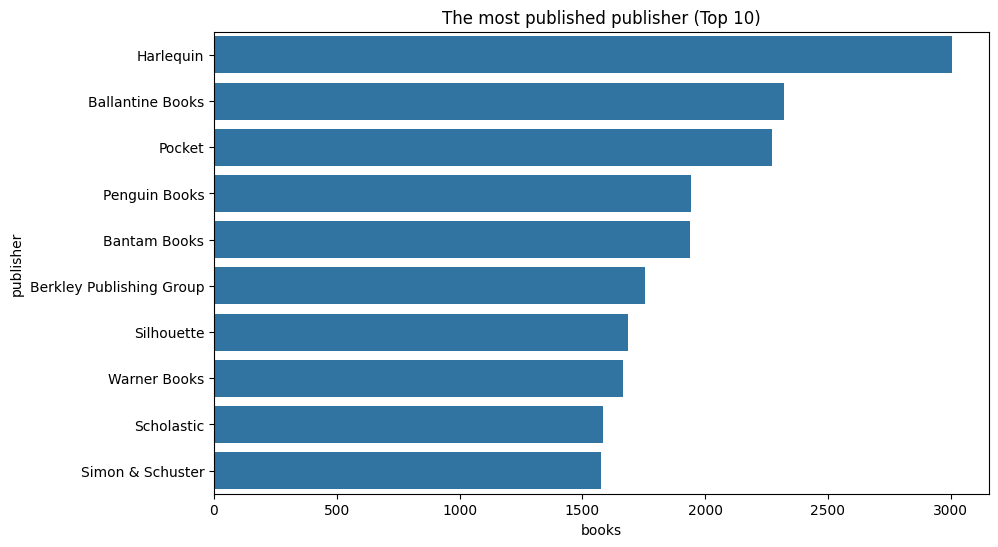

In [ ]:
# 가장 많이 출판된 출판사 상위 10개
top_publishers = books['publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('The most published publisher (Top 10)')
plt.xlabel('books')
plt.ylabel('publisher')
plt.show()

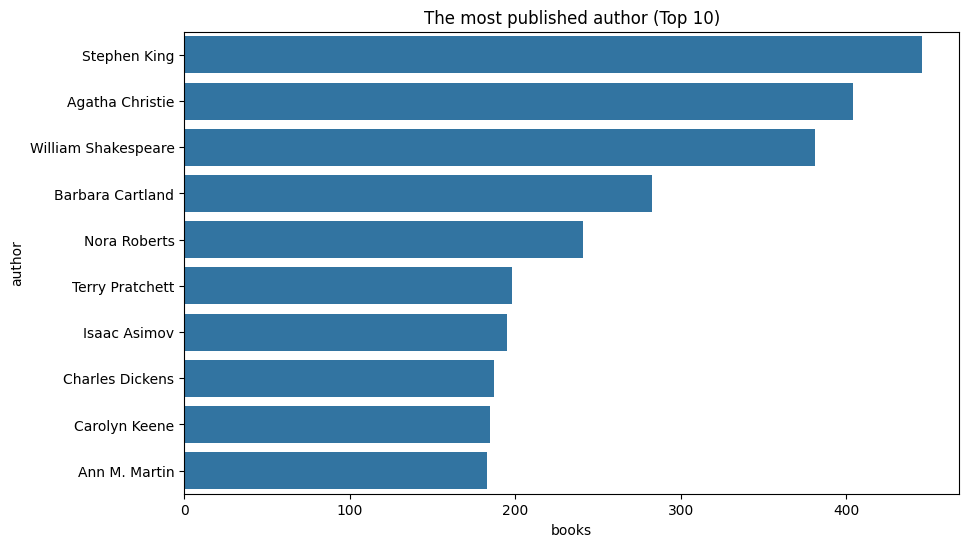

In [ ]:
# 가장 많이 출판된 저자 상위 10명
top_authors = books['book_author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('The most published author (Top 10)')
plt.xlabel('books')
plt.ylabel('author')
plt.show()

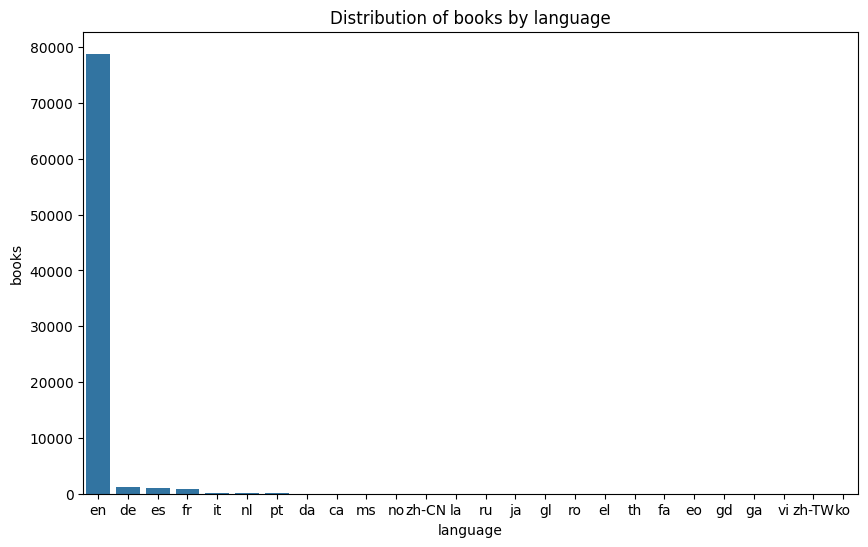

In [ ]:
# 언어별 도서 수 분포
plt.figure(figsize=(10, 6))
language_counts = books['language'].value_counts()
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Distribution of books by language')
plt.xlabel('language')
plt.ylabel('books')
plt.show()

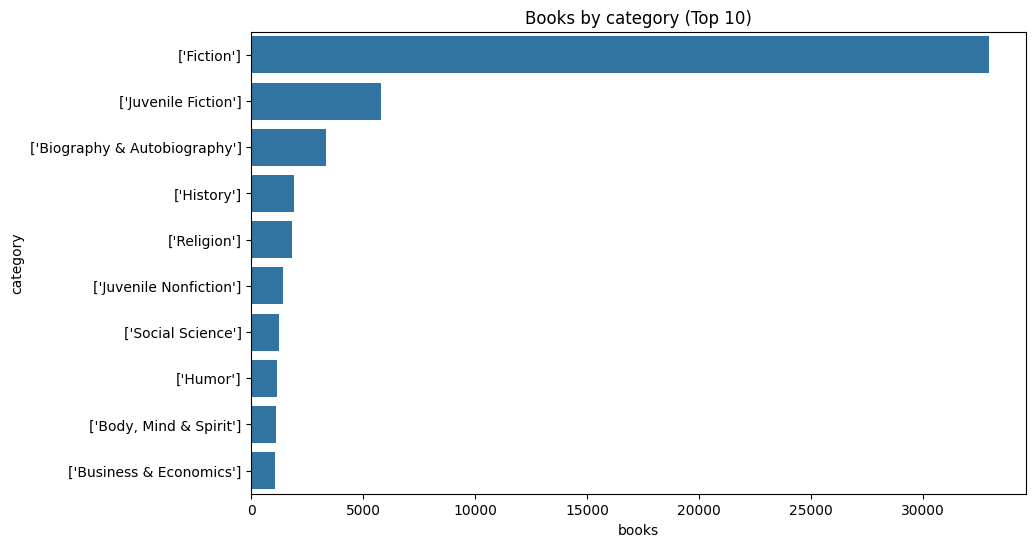

In [ ]:
# 카테고리별 도서 수 분포
plt.figure(figsize=(10, 6))
category_counts = books['category'].value_counts().head(10)  # 상위 10개 카테고리만 표시
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Books by category (Top 10)')
plt.xlabel('books')
plt.ylabel('category')
plt.show()

In [ ]:
books_rating = books.merge(train_ratings, on='isbn')

In [ ]:
books_rating.groupby('category')['rating'].describe().sort_values(by='count', ascending =False) [: 30]

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
['Fiction'],108569.0,6.978585,2.413085,1.0,6.00,8.0,9.00,10.0
['Juvenile Fiction'],12019.0,7.521341,2.381128,1.0,7.00,8.0,9.00,10.0
['Biography & Autobiography'],7648.0,7.245162,2.374545,1.0,6.00,8.0,9.00,10.0
['Humor'],3132.0,7.363985,2.340202,1.0,6.75,8.0,9.00,10.0
['History'],2672.0,7.297904,2.376005,1.0,7.00,8.0,9.00,10.0
['Religion'],2402.0,7.398418,2.482568,1.0,6.00,8.0,9.00,10.0
"['Body, Mind & Spirit']",1729.0,7.207056,2.568942,1.0,6.00,8.0,9.00,10.0
['Juvenile Nonfiction'],1659.0,7.326703,2.554700,1.0,6.00,8.0,9.00,10.0
['Social Science'],1637.0,7.048259,2.406845,1.0,6.00,8.0,9.00,10.0


rating 분포 비슷 

##### Users

- age : 그룹화(10대씩 > 청소년, 청년, 중년, 등)
- location : country가 잘못 기재된 경우 많음 -> city의 최빈값을 기준으로 채우는 게 좋을 듯함 / usa에 몰린 경향 있음

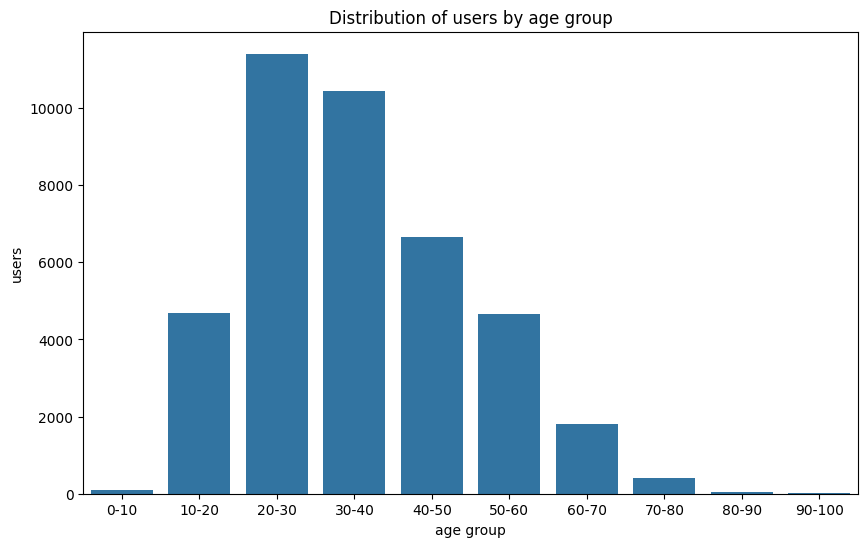

In [ ]:
# 나이가 결측인 데이터 제거
users = users[users['age'].notna()]

# 연령대를 그룹으로 나누기
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels)

# 연령대별 사용자 수 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=users, x='age_group', order=labels)
plt.title('Distribution of users by age group')
plt.xlabel('age group')
plt.ylabel('users')
plt.show()

In [ ]:
# 예시: 0-18, 19-30, 31-50, 51+ 등의 그룹으로 분류
users['age_group'] = pd.cut(users['age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])

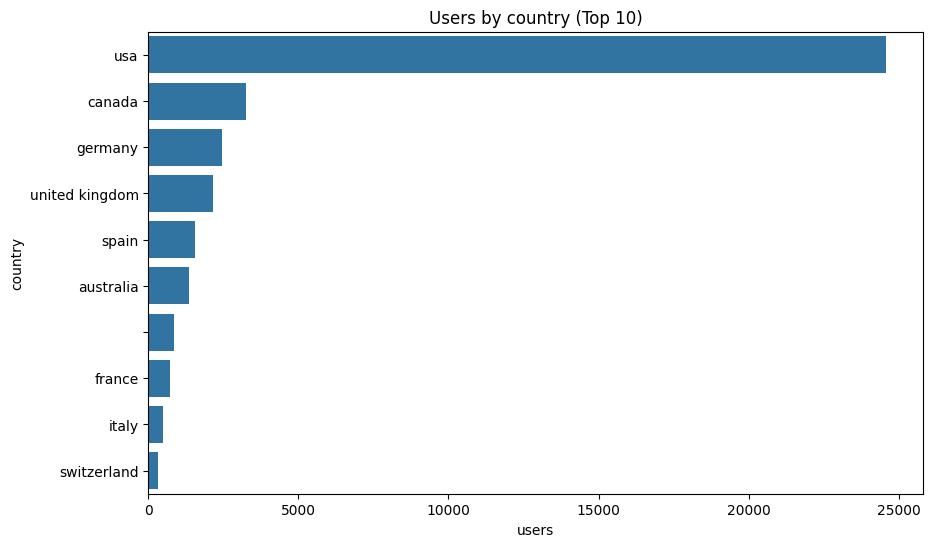

In [ ]:
# 국가 정보 추출
users['country'] = users['location'].apply(lambda x: x.split(',')[-1].strip())

# 상위 10개 국가 시각화
top_countries = users['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Users by country (Top 10)')
plt.xlabel('users')
plt.ylabel('country')
plt.show()

In [ ]:
top_countries

country
usa               24597
canada             3263
germany            2455
united kingdom     2142
spain              1561
australia          1339
                    847
france              708
italy               473
switzerland         310
Name: count, dtype: int64

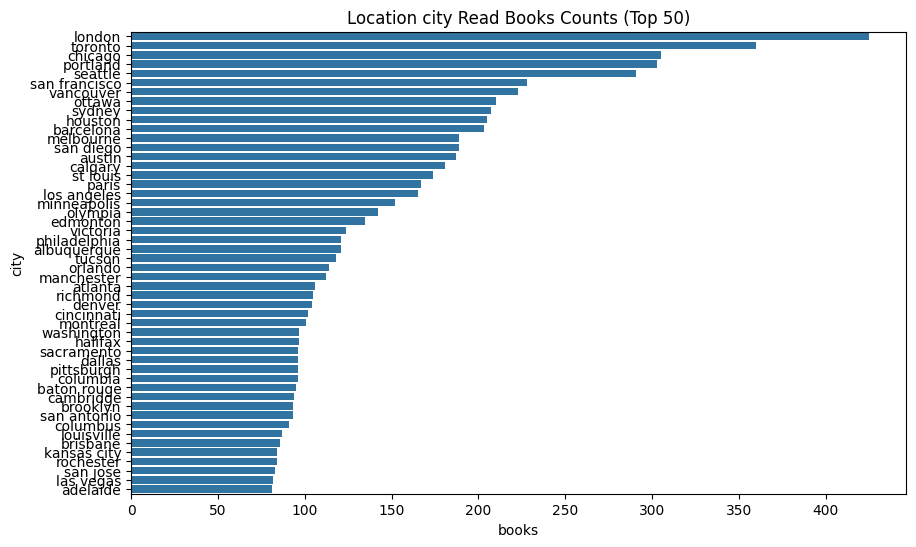

In [ ]:
# 가장 많이 읽은 도시 상위 50개
top_city = users['location_city'].value_counts()[:50]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_city.values, y=top_city.index)
plt.title('Location city Read Books Counts (Top 50)')
plt.xlabel('books')
plt.ylabel('city')
plt.show()

In [ ]:
temp = users.groupby('location_city')['location_country'].value_counts().reset_index()

In [ ]:
temp[temp['location_city'] == 'london']

,location_city,location_country,count
4813,london,united kingdom,363
4814,london,canada,51
4815,london,usa,3


잘못 기재된 경우 많음(나라)-> 최빈값으로 바꾸기

In [ ]:
users['most_common_country'] = users.groupby('location_city')['location_country'].transform(lambda x: x.value_counts().idxmax() if not x.value_counts().empty else 'Unknown')
# 가장 많이 등장하는 country로 location_country 수정
users['location_country'] = users['most_common_country']

# 임시 컬럼 제거
users = users.drop(columns=['most_common_country'])

In [ ]:
users[users['location_city'] == 'london']

,user_id,location,age,location_list,location_country,location_state,location_city,age_group,country
472,12863,"london, england, united kingdom",29.0,"[united kingdom, england, london]",united kingdom,england,london,19-30,united kingdom
479,27624,"london, england, united kingdom",54.0,"[united kingdom, england, london]",united kingdom,england,london,51+,united kingdom
958,41183,"london, england, united kingdom",31.0,"[united kingdom, england, london]",united kingdom,england,london,31-50,united kingdom
1146,68014,"london, england, united kingdom",18.0,"[united kingdom, england, london]",united kingdom,england,london,0-18,united kingdom
1212,76350,"london, england, united kingdom",20.0,"[united kingdom, england, london]",united kingdom,england,london,19-30,united kingdom
...,...,...,...,...,...,...,...,...,...
67582,245606,"london, england, united kingdom",32.0,"[united kingdom, england, london]",united kingdom,england,london,31-50,united kingdom
67617,247146,"london, england, united kingdom",34.0,"[united kingdom, england, london]",united kingdom,england,london,31-50,united kingdom
67640,248394,"london, england, united kingdom",63.0,"[united kingdom, england, london]",united kingdom,england,london,51+,united kingdom
67647,248643,"london, england, united kingdom",46.0,"[united kingdom, england, london]",united kingdom,england,london,31-50,united kingdom


In [ ]:
temp2 = users.groupby('location_city')['location_country'].value_counts().reset_index()

In [ ]:
temp2[temp2['location_city'] == 'seattle']

,location_city,location_country,count
7325,seattle,usa,291


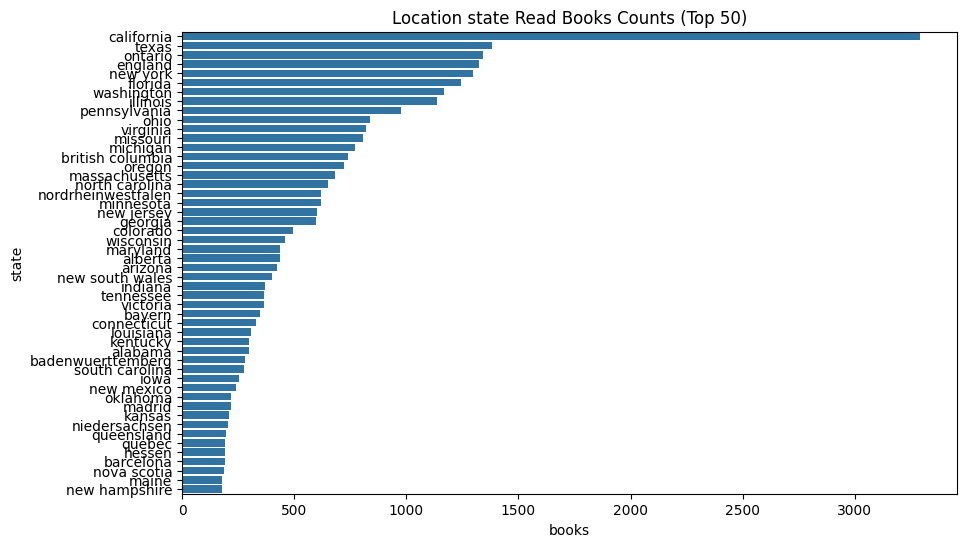

In [ ]:
# 가장 많이 읽은 주 상위 50개
top_state = users['location_state'].value_counts()[:50]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_state.values, y=top_state.index)
plt.title('Location state Read Books Counts (Top 50)')
plt.xlabel('books')
plt.ylabel('state')
plt.show()

- country를 제대로 기재하지 않은 경우가 있음
- 나라 : USA만 너무 많이 몰리게 됨

In [ ]:
users.loc[users['location_city'] == 'earth']

,user_id,location,age,location_list,location_country,location_state,location_city,age_group,country
10618,130482,"earth, , universe",54.0,"[universe, nan, earth]",universe,NaN,earth,51+,universe


##### train_ratings

In [ ]:
train_ratings['rating'].describe()

count    306795.000000
mean          7.069714
std           2.433217
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

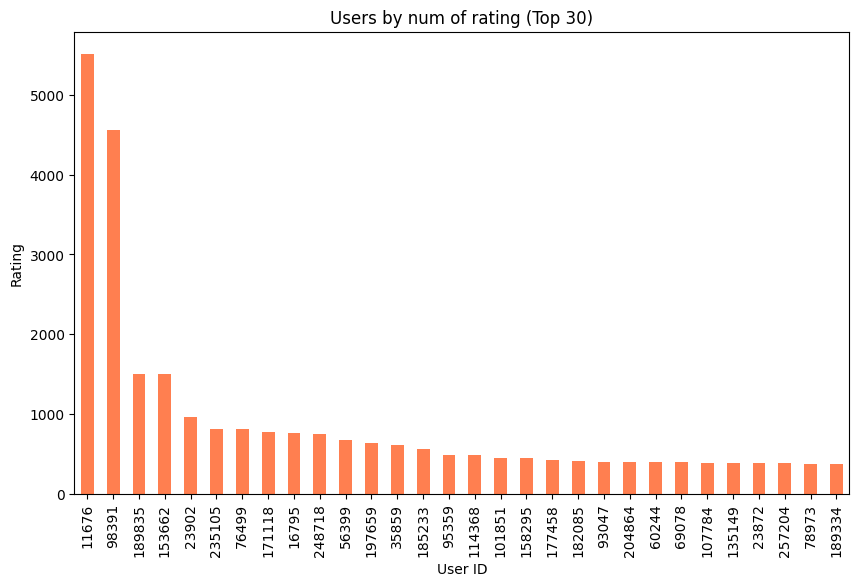

In [ ]:
# 사용자별 평점 수 계산
user_rating_counts = train_ratings['user_id'].value_counts()

# 사용자별 평점 수 분포 시각화 (상위 30명)
plt.figure(figsize=(10, 6))
user_rating_counts.head(30).plot(kind='bar', color='coral')
plt.title('Users by num of rating (Top 30)')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.show()

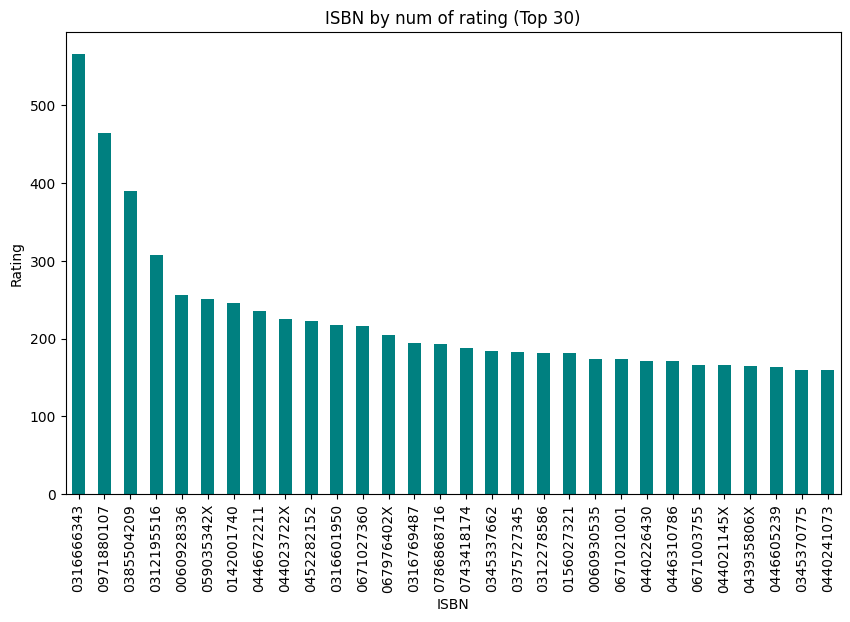

In [ ]:
# 도서별 평점 수 계산
book_rating_counts = train_ratings['isbn'].value_counts()

# 도서별 평점 수 분포 시각화 (상위 30개)
plt.figure(figsize=(10, 6))
book_rating_counts.head(30).plot(kind='bar', color='teal')
plt.title('ISBN by num of rating (Top 30)')
plt.xlabel('ISBN')
plt.ylabel('Rating')
plt.show()

In [ ]:
current_year = 2024
books['book_age'] = current_year - books['year_of_publication']

In [ ]:
books['book_age'].head

<bound method NDFrame.head of 0         23.0
1         33.0
2         25.0
3         33.0
4         24.0
          ... 
149565    37.0
149566    23.0
149567    39.0
149568    27.0
149569    25.0
Name: book_age, Length: 149570, dtype: float64>

In [ ]:
# 책 데이터와 평점 데이터를 ISBN을 기준으로 병합
merged_df = train_ratings.merge(books[['isbn', 'category']], on='isbn', how='left')

In [ ]:
# 도서별 평점 수와 평균 평점 간의 상관관계
book_avg_ratings = train_ratings.groupby('isbn')['rating'].mean()
book_rating_counts = train_ratings.groupby('isbn')['rating'].count()

correlation = book_avg_ratings.corr(book_rating_counts)
print("평점 수와 평균 평점의 상관관계:", correlation)


평점 수와 평균 평점의 상관관계: 0.022110367557030188


In [ ]:
user_rating_counts = train_ratings.groupby('user_id').size().reset_index(name='rating_count')

In [ ]:
user_rating_counts['rating_count'].describe()

count    59803.000000
mean         5.130094
std         35.517624
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5520.000000
Name: rating_count, dtype: float64

In [ ]:
# 사분위수를 기준으로 활동 레벨 나누기
user_rating_counts['activity_level'] = pd.qcut(user_rating_counts['rating_count'], 
                                               q=[0, 0.25, 0.75, 1], 
                                               labels=['Low', 'Medium', 'High'],
                                               duplicates='drop')

# 각 활동 레벨별 사용자 수 확인
activity_counts = user_rating_counts['activity_level'].value_counts()
print(activity_counts)

In [ ]:
from sklearn.cluster import KMeans

X = user_rating_counts[['rating_count']]

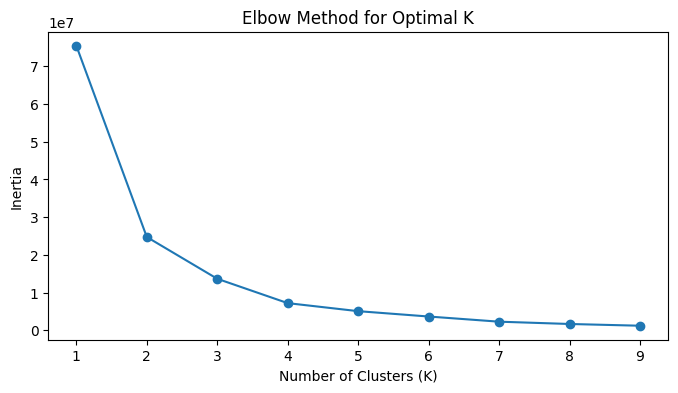

In [ ]:
inertia = []
K_range = range(1, 10)

# 각 K값에 대한 inertia(군집 내 거리의 합)를 계산
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

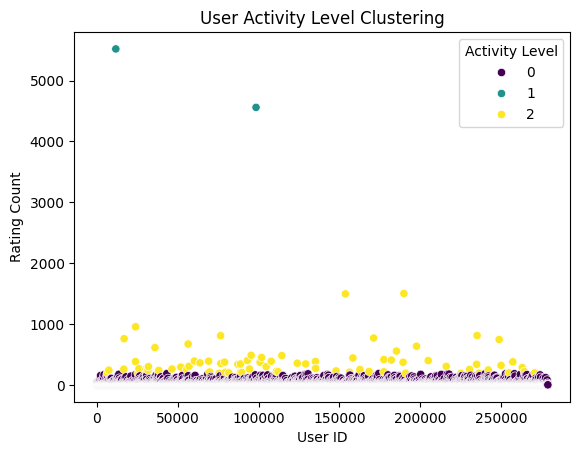

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
user_rating_counts['activity_level'] = kmeans.fit_predict(X)

# 클러스터 결과를 시각화
sns.scatterplot(data=user_rating_counts, x='user_id', y='rating_count', hue='activity_level', palette='viridis')
plt.title("User Activity Level Clustering")
plt.xlabel("User ID")
plt.ylabel("Rating Count")
plt.legend(title='Activity Level')
plt.show()

In [ ]:
# 예: 클러스터 번호를 활동 수준으로 재매핑
user_rating_counts['activity_level'] = user_rating_counts['activity_level'].map({0: 'Low', 1: 'High', 2: 'Medium'})


In [ ]:
user_rating_counts.sort_values(by='rating_count', ascending=False).head(20)

,user_id,rating_count,activity_level
2375,11676,5520,High
21180,98391,4560,High
40635,189835,1503,Medium
33037,153662,1496,Medium
4915,23902,956,Medium
50279,235105,812,Medium
16478,76499,810,Medium
36677,171118,771,Medium
3417,16795,760,Medium
53342,248718,747,Medium


In [ ]:
# Activity Level별 rating_count의 최소, 최대, 평균값 확인
activity_level_summary = user_rating_counts.groupby('activity_level')['rating_count'].agg(['min', 'max', 'mean'])
print(activity_level_summary)

                 min   max         mean
activity_level                         
High            4560  5520  5040.000000
Low                1   189     4.466846
Medium           192  1503   379.063291


In [ ]:
user_rating_counts['activity_level'].value_counts()

activity_level
Low       59722
Medium       79
High          2
Name: count, dtype: int64

In [ ]:
high_user_id = user_rating_counts[user_rating_counts['activity_level'] == 'Low']['user_id'].values

is_user_in_test = test_ratings['user_id'].isin(high_user_id)
is_user_in_test_ids = test_ratings[is_user_in_test]['user_id'].unique()
test_ratings[is_user_in_test]['user_id'].nunique()

17820

In [ ]:
not_in_train = set(is_user_in_test_ids) - set(high_user_id)
len(not_in_train)

0

In [ ]:
not_in_test = set(high_user_id) - set(is_user_in_test_ids)
len(not_in_test)

41902

**아이디어 정리**
- 유저별 활동레벨 파생변수 -> 가중치(coldstart 구분)
- 평균 평점을 기준으로 유저의 평점 기준 (후한 편인지 박한 편인지)
- 도서별 인기도 계산 -> 베스트셀러 같은 도서에 가중치 부여
- 유저별 선호 카테고리, 저자
- 유저 연령대랑 책 나이랑 엮어서 같은 세대 판단
- 카테고리 결측치는 해당 저자의 최빈값으로 채우기

### Feature Engineering

location 변수 쪼개기

In [8]:
def split_location(x: str) -> list:
    '''
    Parameters
    ----------
    x : str
        location 데이터

    Returns
    -------
    res : list
        location 데이터를 나눈 뒤, 정제한 결과를 반환합니다.
        순서는 country, state, city, ... 입니다.
    '''
    res = x.split(',')
    res = [i.strip().lower() for i in res]
    res = [regex.sub(r'[^a-zA-Z/ ]', '', i) for i in res]  # remove special characters
    res = [i if i not in ['n/a', ''] else np.nan for i in res]  # change 'n/a' into NaN
    res.reverse()  # reverse the list to get country, state, city, ... order

    for i in range(len(res)-1, 0, -1):
        if (res[i] in res[:i]) and (not pd.isna(res[i])):  # remove duplicated values if not NaN
            res.pop(i)

    return res

In [9]:
users['location_list'] = users['location'].apply(lambda x: split_location(x)) 
users['location_country'] = users['location_list'].apply(lambda x: x[0])
users['location_state'] = users['location_list'].apply(lambda x: x[1] if len(x) > 1 else np.nan)
users['location_city'] = users['location_list'].apply(lambda x: x[2] if len(x) > 2 else np.nan)

결측치 처리

In [10]:
books['language'] = books['language'].fillna('en')

In [11]:
books = books.fillna('Unknown')

In [12]:
books['category'] = books['category'].apply(lambda x: x.split('[')[1].split(']')[0][1:-1] if isinstance(x, str) and '[' in x else x)

In [13]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,Actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,1940-1949,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,Medical,"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,Fiction,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,History,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


In [14]:
books['category'].value_counts()

category
Unknown                               68851
Fiction                               32956
Juvenile Fiction                       5804
Biography & Autobiography              3320
History                                1925
                                      ...  
Victims of crimes                         1
Adaptability (Psychology)                 1
Mutual funds                              1
Middle aged women                         1
Boundary Waters Canoe Area (Minn.)        1
Name: count, Length: 4293, dtype: int64

In [23]:
books['category'].value_counts().head()

category
Unknown                      68851
Fiction                      32956
Juvenile Fiction              5804
Biography & Autobiography     3320
History                       1925
Name: count, dtype: int64

In [24]:
category_avg_rating = train_ratings.merge(books[['isbn', 'category']], on='isbn') \
                                   .groupby('category')['rating'].mean().to_dict()

In [25]:
category_avg_rating

{'0': 4.5,
 '0Islands': 7.0,
 '11030 - fiction in English - 1900-1945 - 60030 - texts': 8.0,
 '11030 - short stories in English - p1030 - Canadian writers - 1945- - 60030 - texts': 9.0,
 '1900-1999': 7.0,
 '1940-1949': 8.0,
 '20th century general fiction': 9.0,
 '364614153': 6.0,
 '87th Precinct (Imaginary place)': 9.0,
 'A Grow and Learn Library': 7.666666666666667,
 "ABC's": 4.0,
 'AIDS (Disease)': 6.526315789473684,
 'AIDS (Disease) in children': 5.0,
 'AMERICAN BOOK AWARD.': 9.333333333333334,
 'ANIMAUX SAUVAGES.': 8.0,
 'ART': 2.0,
 'ASP (Computer network protocol)': 6.0,
 'AWK (Langage de programmation)': 7.0,
 'Aanhalings, Engels': 6.0,
 'Aardvark': 9.0,
 'Abandoned children': 5.75,
 'Abbeys': 7.333333333333333,
 'Abbreviations': 2.0,
 'Abdomen': 5.0,
 'Abduction': 6.0,
 'Abduction.': 7.111111111111111,
 'Aberdeen (Scotland)': 1.0,
 'Ability': 7.0,
 'Ability.': 2.0,
 'Abnormal reflexes': 9.0,
 'Aboriginal': 1.0,
 'Aboriginal Australians': 7.705882352941177,
 'Abortion': 6.436363

In [15]:
users['age'] = users['age'].fillna(users['age'].mode()[0])
users['age_range'] = users['age'].apply(lambda x: x // 10 * 10)  # 10대, 20대, 30대, ...

In [16]:
# 예시: 0-18, 19-30, 31-50, 51+ 등의 그룹으로 분류
users['age_group'] = pd.cut(users['age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])

Feature

In [17]:
current_year = 2024
books['book_age'] = current_year - books['year_of_publication']

In [19]:
user_rating_counts = train_ratings.groupby('user_id').size().reset_index(name='rating_count')

In [ ]:
# Kmeans로 activity_level 나누기
from sklearn.cluster import KMeans

X = user_rating_counts[['rating_count']]

kmeans = KMeans(n_clusters=3, random_state=0)
user_rating_counts['activity_level'] = kmeans.fit_predict(X)

# 예: 클러스터 번호를 활동 수준으로 재매핑
user_rating_counts['activity_level'] = user_rating_counts['activity_level'].map({0: 'Low', 1: 'High', 2: 'Medium'})

In [20]:
# 3-13 기준 activity_level 나누기
def determine_activity_level(rating_count):
    if rating_count >= 14:
        return 'High'
    elif 3 <= rating_count <= 13:
        return 'Medium'
    else:
        return 'Low'

# # rating_count 열을 사용하여 activity_level 열을 업데이트
# user_rating_counts['activity_level'] = user_rating_counts['rating_count'].apply(determine_activity_level)

# users 데이터프레임에 rating_count와 activity_level 추가
users['rating_count'] = users['user_id'].map(user_rating_counts.set_index('user_id')['rating_count']).fillna(0).astype(int)
users['activity_level'] = users['rating_count'].apply(determine_activity_level)



In [ ]:
#users = users.merge(user_rating_counts[['user_id', 'activity_level']], on='user_id', how='left')

In [21]:
users.head(20)

,user_id,location,age,location_list,location_country,location_state,location_city,age_range,age_group,rating_count,activity_level
0,8,"timmins, ontario, canada",29.0,"[canada, ontario, timmins]",canada,ontario,timmins,20.0,19-30,7,Medium
1,11400,"ottawa, ontario, canada",49.0,"[canada, ontario, ottawa]",canada,ontario,ottawa,40.0,31-50,12,Medium
2,11676,"n/a, n/a, n/a",29.0,"[nan, nan, nan]",NaN,NaN,NaN,20.0,19-30,5520,High
3,67544,"toronto, ontario, canada",30.0,"[canada, ontario, toronto]",canada,ontario,toronto,30.0,19-30,7,Medium
4,85526,"victoria, british columbia, canada",36.0,"[canada, british columbia, victoria]",canada,british columbia,victoria,30.0,31-50,120,High
5,96054,"ottawa, ontario, canada",29.0,"[canada, ontario, ottawa]",canada,ontario,ottawa,20.0,19-30,16,High
6,116866,"ottawa, ,",29.0,"[nan, nan, ottawa]",NaN,NaN,ottawa,20.0,19-30,49,High
7,123629,"kingston, ontario, canada",29.0,"[canada, ontario, kingston]",canada,ontario,kingston,20.0,19-30,1,Low
8,177458,"ottawa, ontario, canada",29.0,"[canada, ontario, ottawa]",canada,ontario,ottawa,20.0,19-30,417,High
9,200273,"comber, ontario, canada",29.0,"[canada, ontario, comber]",canada,ontario,comber,20.0,19-30,1,Low


In [ ]:
books.head()

In [ ]:
print(users.columns)
print(books.columns)

In [ ]:
#사용할 피쳐를 결정하여 평점 dataframe에 조인하기
user_features = ['user_id', 'age_range', 'location_country', 'location_state', 'location_city', 'activity_level']
item_features = ['isbn', 'book_title', 'book_author','year_of_publication', 'publisher', 'language', 'category', 'summary', 'book_age']

df = pd.merge(train_ratings, users[user_features], on='user_id', how='left')
df = pd.merge(df, books[item_features], on='isbn', how='left')

In [ ]:
df = df.fillna('Unknown')

In [ ]:
df.isnull().sum()